In [1]:
%matplotlib notebook
%run bs.py
plt.rcParams['animation.html'] = 'html5' # or 'jshtml'

In [2]:
birth_redistribution = GaussianEffects()
initial_population = GaussianRates(birth_redistribution.n_rates)
population = Population(initial_population, birth_redistribution)
evolution = Evolution(population)

bs_population = BS_Population(initial_population, birth_redistribution)
bs_evolution = Evolution(bs_population)

`BS_Population` is a subclass of `Population`. The annual update method of a `Population` instance treats the birth rates and the death rate as logarithmic. It also lumps the out-of-range births (mutants) with the endpoints of the population distribution. The annual update method of a `BS_Population` instance treats the rates as linear, and discards the out-of-range births, precisely as Basener's script does.

By default, a `BS_Population` is what BS call &ldquo;infinite,&rdquo; meaning that relatively small frequencies are retained, just as with a `Population`. The only differences in the two populations we have just created are those described in the preceding paragraph. We will see mometarily that the differences make a difference.

The length of a Population instance is the number of discrete growth rates (fitnesses) over which the population is distributed.

In [3]:
len(population), len(bs_population)

(251, 251)

The length of an `Evolution` instance is the number of years in the evolutionary process. The length of a fresh instance is 1 because year 0 is included.

In [4]:
len(evolution), len(bs_evolution)

(1, 1)

To extend the evolutionary process by $n$ years, call the `Evolution` instance with parameter $n.$

In [5]:
evolution(100), bs_evolution(100)
len(evolution), len(bs_evolution)

(101, 101)

In [6]:
evolution(200), bs_evolution(200)
len(evolution), len(bs_evolution)

(301, 301)

Now we animate the two evolutionary processes. The `stride` parameter determines how many years the animation advances in each frame. The time required to generate an HTML5 video is inversely proportional to the stride.

(I haven't yet provided the means to determine which of the differences in `Population` and `BS_Population` is making a difference, but I'm pretty sure that dicarding out-of-range mutants has little effect in this particular experiment. The further the birth rates from 0, the worse the linear approximation.)

<IPython.core.display.Javascript object>


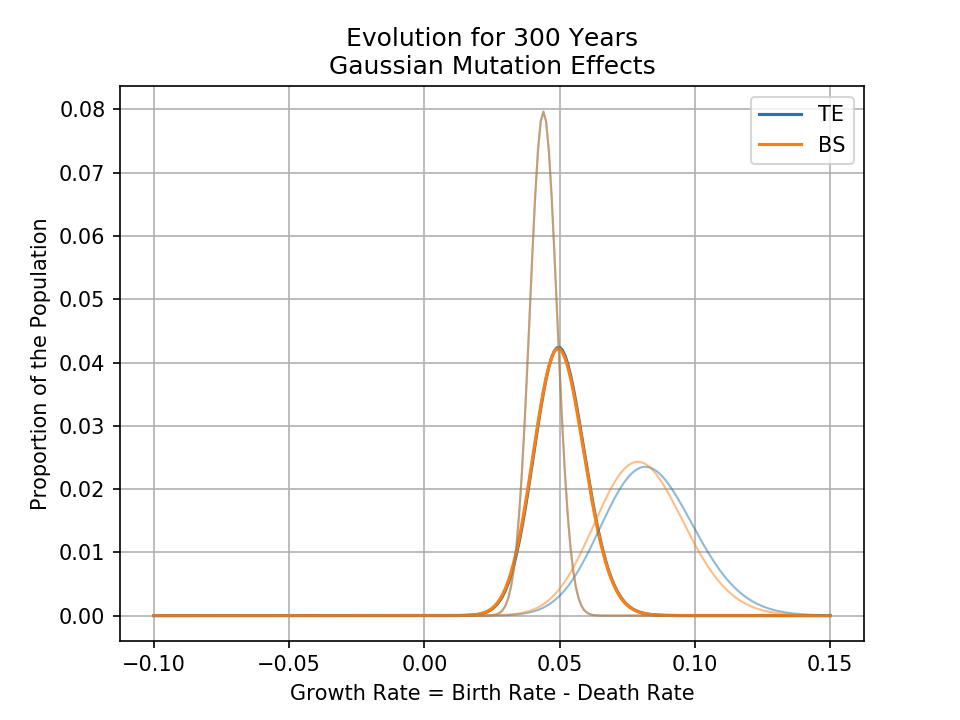

In [7]:
animate([evolution, bs_evolution], ['TE', 'BS'], stride=2, subtitle='\nGaussian Mutation Effects')

Now we switch to the (reflected, rescaled) Gamma distribution over mutation effects&nbsp;&mdash; but without Basener's gimmick of setting the probability that mutation has no effect on fitness to the probability that mutation has a minimally deleterious effect on fitness. We want to see the change in the evolutionary process when mutations at $L=2^n$ loci, $n = 0, 1, 2, 14,$ have iid effects on fitness, with the number of mutations per offspring held at 1.

In [8]:
# Pixiedust Node fails if the objects are stored in lists
exponents = np.array([0, 1, 2, 14])
iid_mutations = np.empty(len(exponents), dtype=object)
processes = np.empty(len(exponents), dtype=object)

for i in range(len(exponents)):
    iid_mutations[i] = GammaEffects(number_of_mutations=1, log_number_of_loci=exponents[i])
    initial_population = GaussianRates(iid_mutations[i].n_rates)
    processes[i] = Evolution(Population(initial_population, iid_mutations[i]))

We run each of the evolutionary processes for 2500 years.

In [9]:
for p in processes:
    p(2500)

Now we animate the processes.

<IPython.core.display.Javascript object>


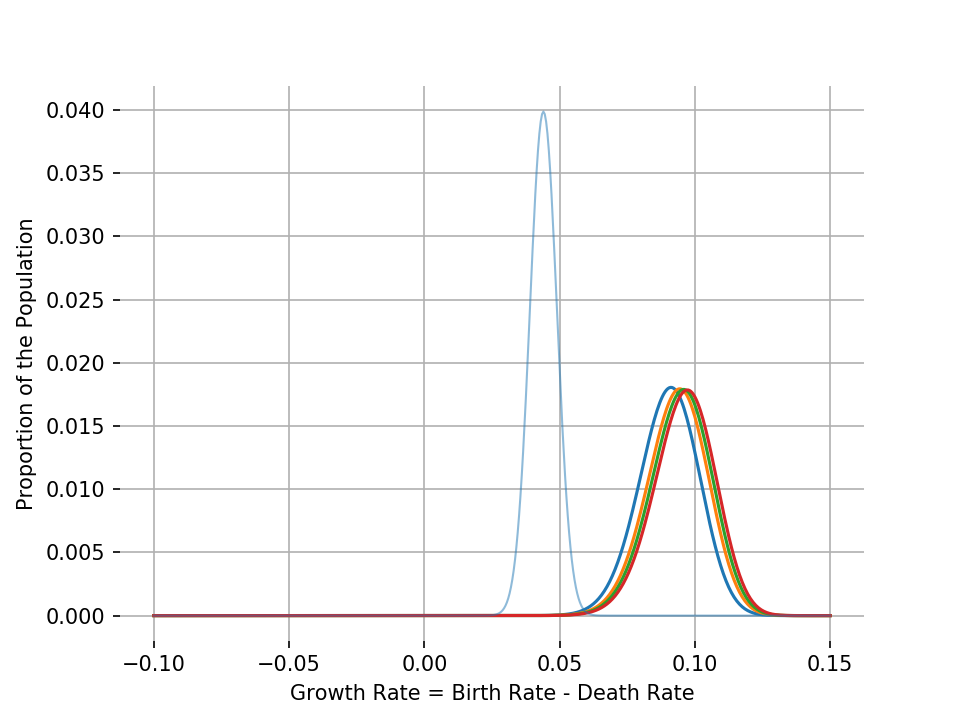

In [10]:
animate(processes, exponents, stride=10, subtitle='\nOne Mutation, Log-Number of Loci Varying')

To get a clearer picture, we omit $n=2$ from the animation.

<IPython.core.display.Javascript object>


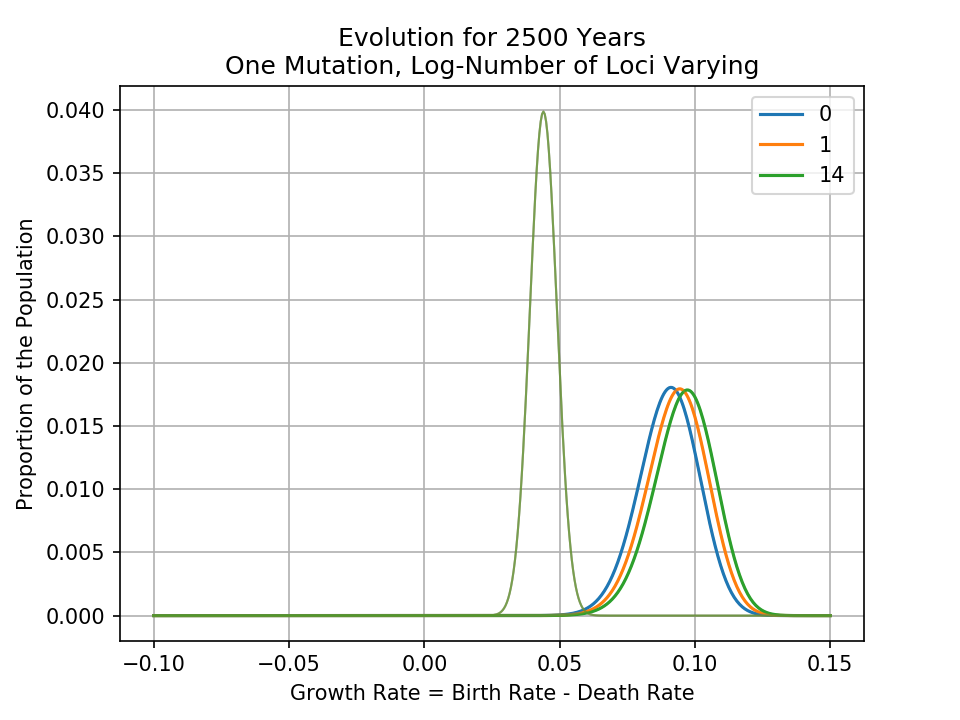

In [11]:
p = processes[[0, 1, 3]]
e = exponents[[0, 1, 3]]
animate(p, e, stride=10, subtitle='\nOne Mutation, Log-Number of Loci Varying')

Let's plot the distributions of mutation effects for $\log_2 L = 0, 1, 14.$

<IPython.core.display.Javascript object>


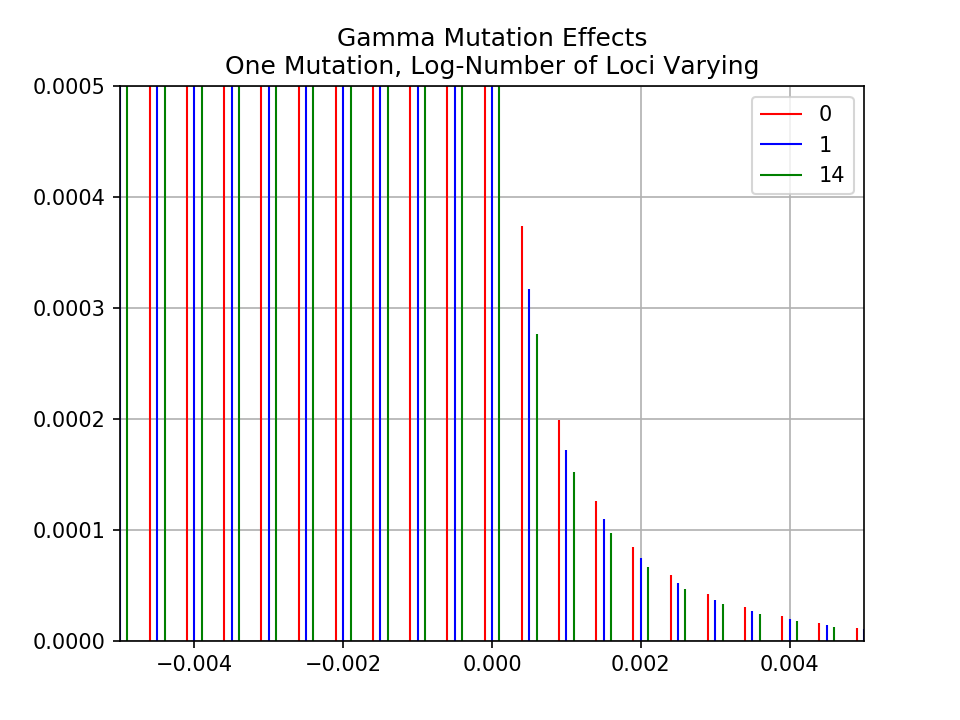

In [12]:
fig = plt.figure()
axes = fig.gca()
line_width = 1
offset = 0.00010
line = iid_mutations[0].vlines(axes, x_offset=-offset, label=exponents[0])
line.set(color='r', lw=line_width)
line = iid_mutations[1].vlines(axes, x_offset= 0.0000, label=exponents[1])
line.set(color='b', lw=line_width)
line = iid_mutations[3].vlines(axes, x_offset=+offset, label=exponents[3])
line.set(color='g', lw=line_width)
plt.grid()
plt.xlim(-0.005, +0.005)
plt.legend(loc='best')
plt.title('Gamma Mutation Effects\nOne Mutation, Log-Number of Loci Varying');

Now we take a look at the upper tail.

<IPython.core.display.Javascript object>


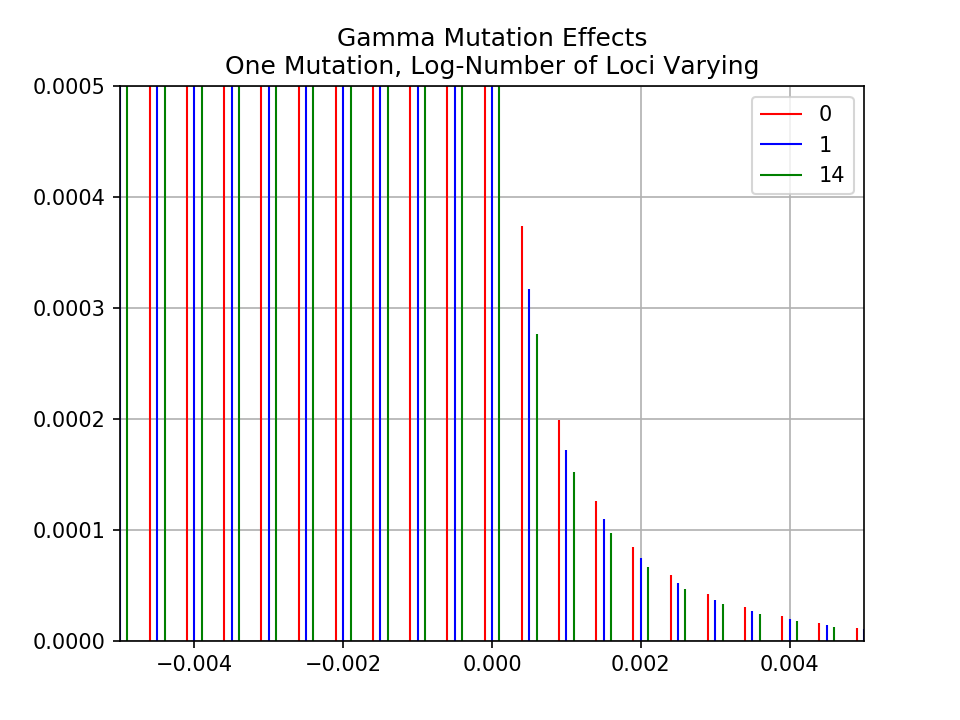

In [13]:
axes.set_ylim(0, 0.0005)
fig